# House Price Index (HPI) Data — Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
df = pd.read_csv('HPI_master.csv')
df.head()

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
0,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,1,100.00,100.00
1,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,2,101.03,101.11
2,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,3,101.40,101.08
3,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,4,101.79,101.10
4,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,5,102.44,101.50


## Dataset Overview and Info

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99325 entries, 0 to 99324
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hpi_type    99325 non-null  object 
 1   hpi_flavor  99325 non-null  object 
 2   frequency   99325 non-null  object 
 3   level       99325 non-null  object 
 4   place_name  99325 non-null  object 
 5   place_id    99325 non-null  object 
 6   yr          99325 non-null  int64  
 7   period      99325 non-null  int64  
 8   index_nsa   99323 non-null  float64
 9   index_sa    32134 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 7.6+ MB


## Summary Statistics

In [3]:
df.describe(include='all')

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
count,99325,99325,99325,99325,99325,99325,99325.000000,99325.000000,99323.000000,32134.000000
unique,4,3,2,4,464,464,NaN,NaN,NaN,NaN
top,traditional,all-transactions,quarterly,MSA,East North Central Division,DV_ENC,NaN,NaN,NaN,NaN
freq,93887,67191,96245,69461,678,678,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2000.307083,2.611971,151.396561,167.190514
std,NaN,NaN,NaN,NaN,NaN,NaN,9.837127,1.431352,68.671596,55.470834
min,NaN,NaN,NaN,NaN,NaN,NaN,1975.000000,1.000000,18.310000,69.590000
25%,NaN,NaN,NaN,NaN,NaN,NaN,1993.000000,2.000000,103.435000,119.012500
50%,NaN,NaN,NaN,NaN,NaN,NaN,2001.000000,3.000000,140.930000,162.460000
75%,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,4.000000,184.920000,200.850000


## Missing Values

In [4]:
df.isnull().sum()

hpi_type          0
hpi_flavor        0
frequency         0
level             0
place_name        0
place_id          0
yr                0
period            0
index_nsa         2
index_sa      67191
dtype: int64

## Value Counts for Categorical Columns

In [5]:
for col in ['hpi_type', 'hpi_flavor', 'frequency', 'level']:
    print(f"\n{col}:")
    print(df[col].value_counts())


hpi_type:
traditional      93887
non-metro         4042
distress-free     1224
developmental      172
Name: hpi_type, dtype: int64

hpi_flavor:
all-transactions    67191
purchase-only       20812
expanded-data       11322
Name: hpi_flavor, dtype: int64

frequency:
quarterly    96245
monthly       3080
Name: frequency, dtype: int64

level:
MSA                       69461
State                     22912
USA or Census Division     6780
Puerto Rico                 172
Name: level, dtype: int64


## HPI Trends (Non-Seasonally Adjusted) Over Time for Selected Places

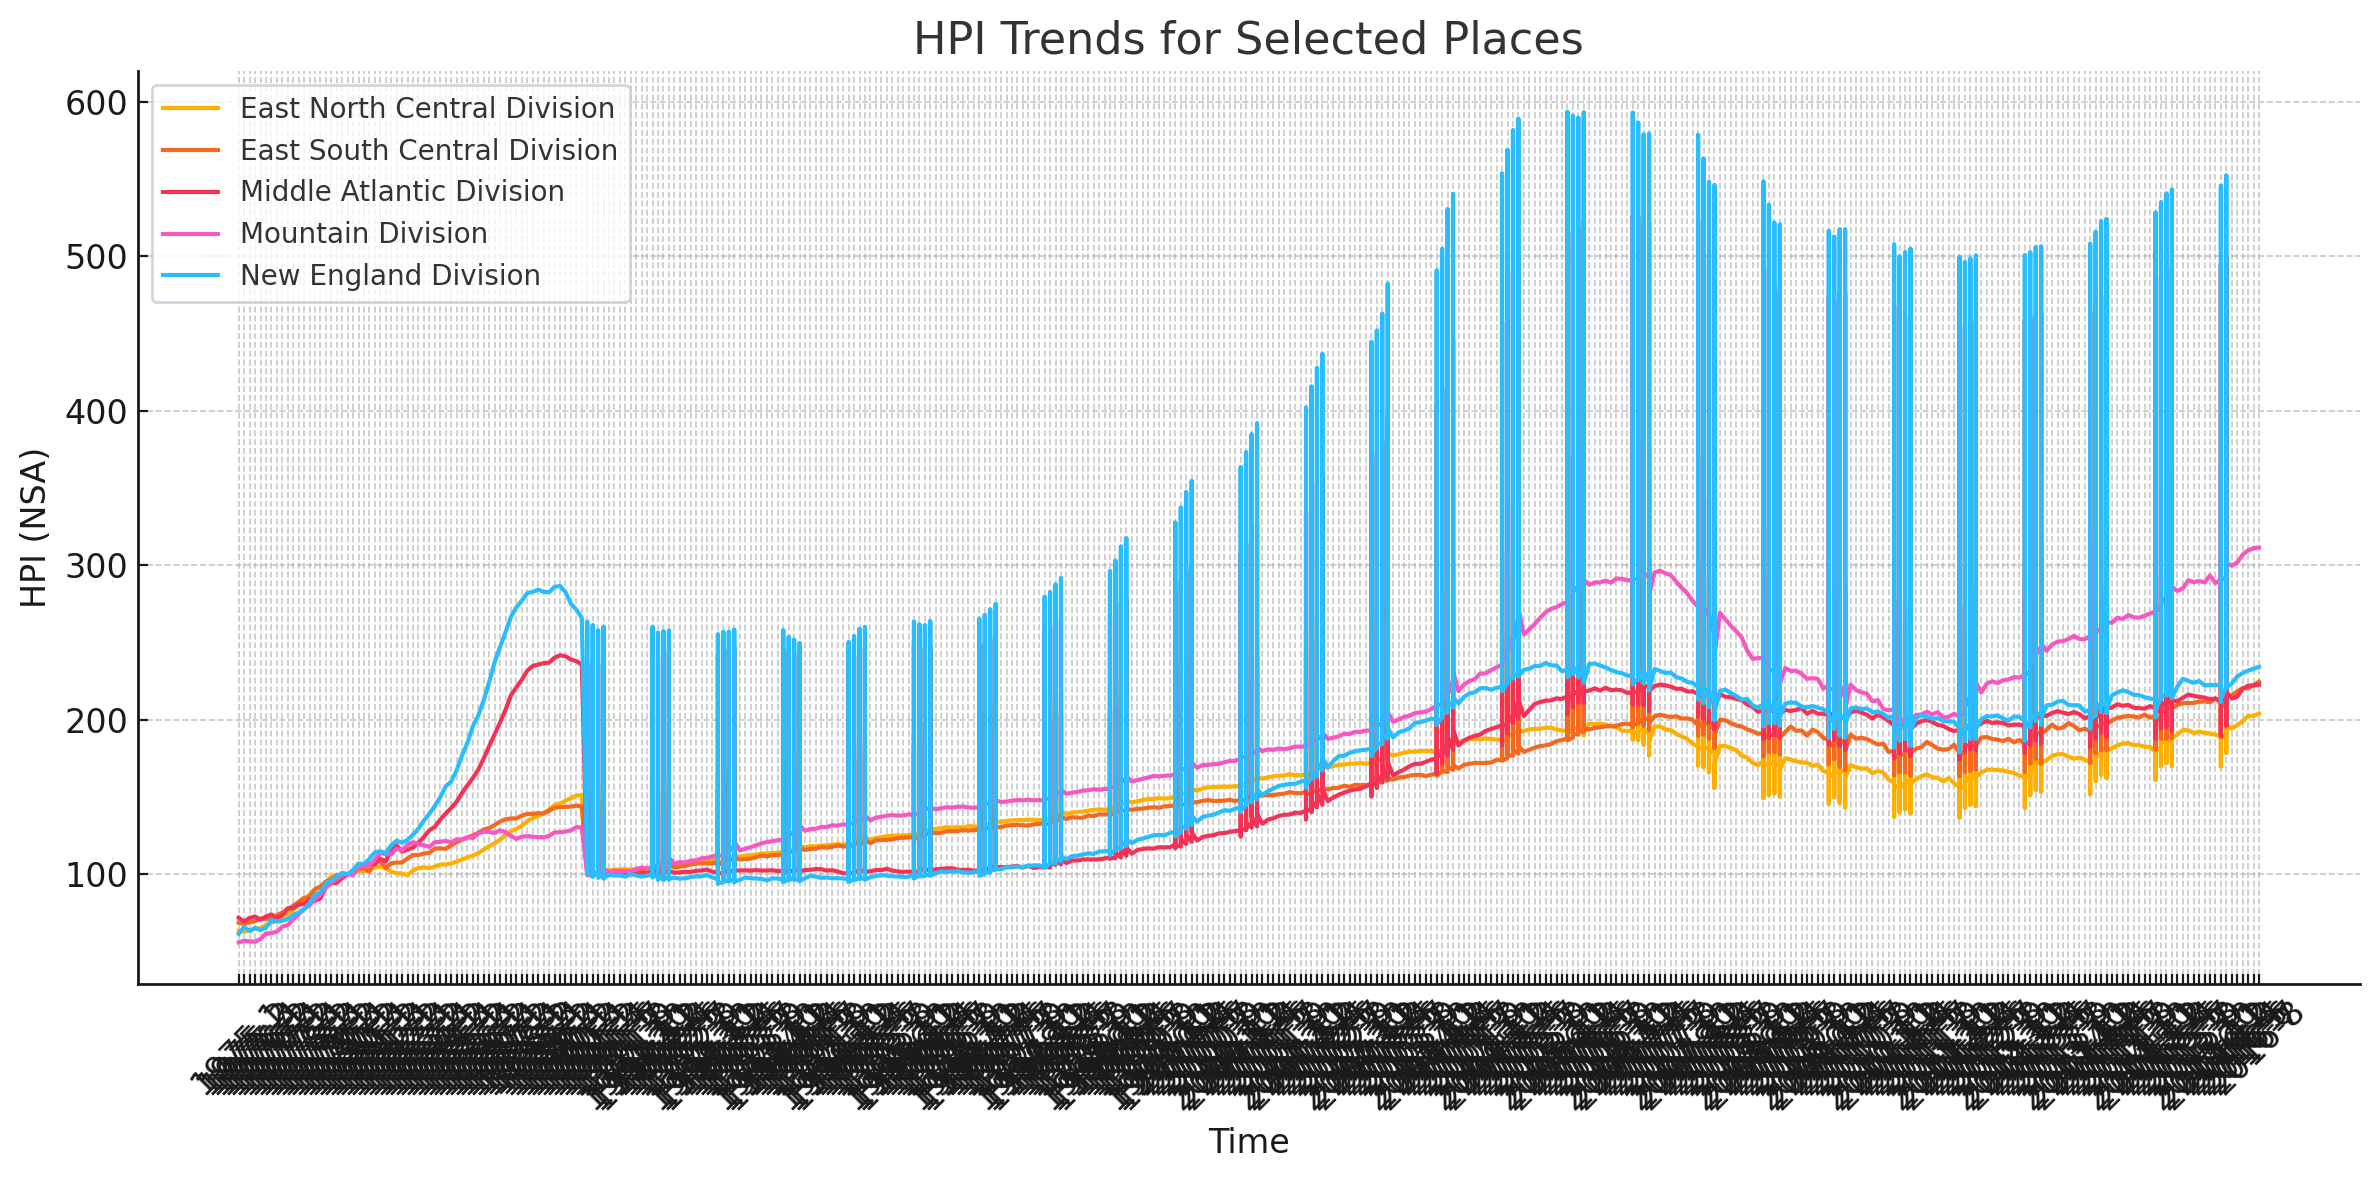

In [6]:
plt.figure(figsize=(12, 6))
for place in df['place_name'].unique()[:5]:  # just plot first 5 places
    subset = df[df['place_name'] == place]
    subset = subset.sort_values(['yr', 'period'])
    time_index = subset['yr'].astype(str) + '-' + subset['period'].astype(str)
    plt.plot(time_index, subset['index_nsa'], label=place)
plt.xticks(rotation=45)
plt.title('HPI Trends for Selected Places')
plt.xlabel('Time')
plt.ylabel('HPI (NSA)')
plt.legend()
plt.tight_layout()
plt.show()

## Correlation Heatmap

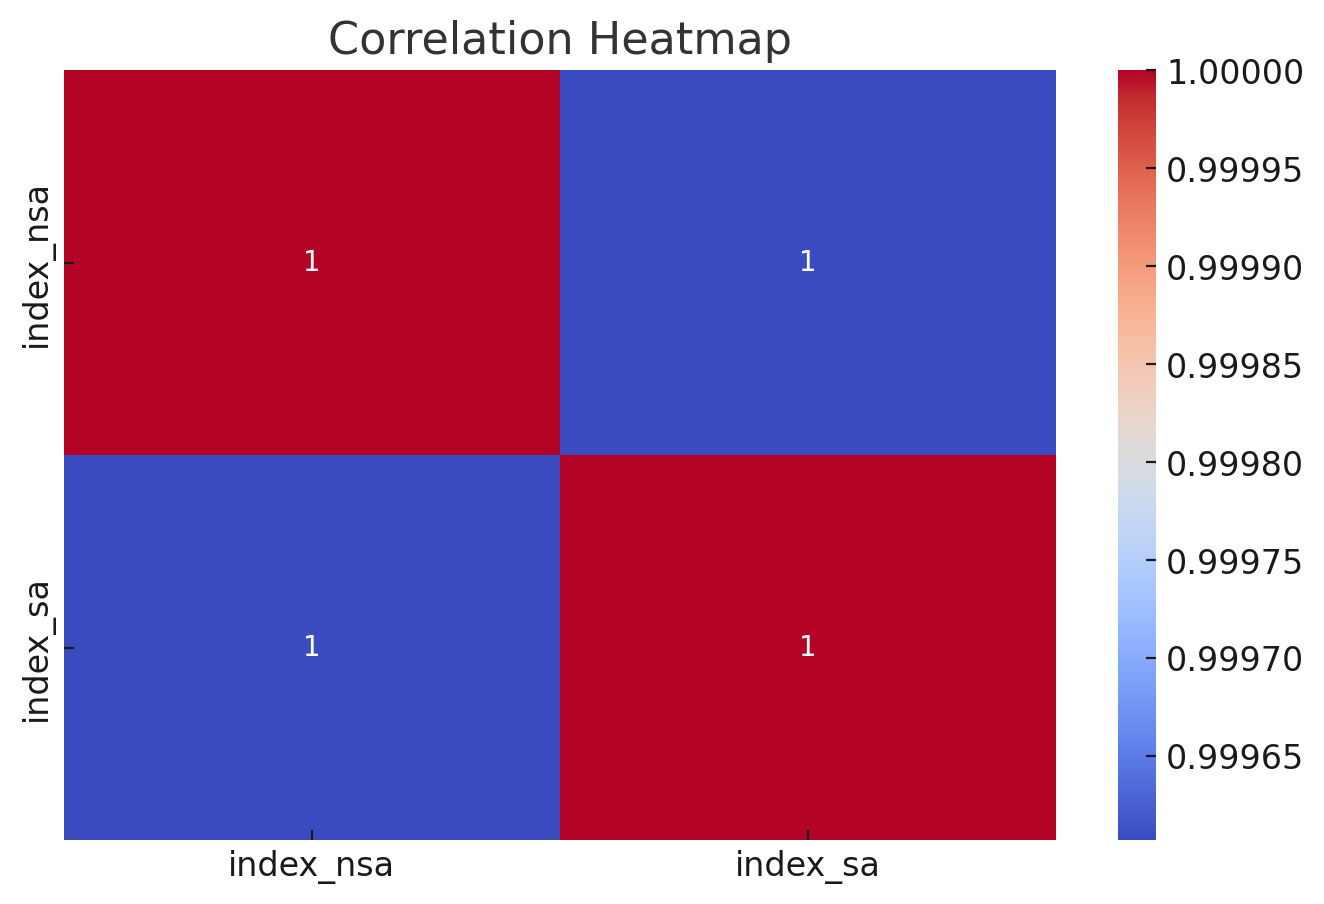

In [7]:
plt.figure(figsize=(8, 5))
sns.heatmap(df[['index_nsa', 'index_sa']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()